Analysing Netflix TV Show Trends: Maturity Rating

This notebook will look into the maturity ratings of Netflix TV shows and its evolution since Netflix became a streaming service in 2007. As well as defining the different categories, this notebook will also analyse the trends of maturity ratings, popularity of shows based on maturity ratings as well as its correlations with genres, imdb scores and audience demographics.

In [369]:
# Import Modules/Dependancies
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as st 
import ast
import numpy

In [407]:
# Read CSV File
netflix_shows = pd.read_csv("../Resources/netflix_shows.csv")

# Display DataFrame
netflix_shows.head()

,title,release_year,age_certification,runtime,language,genres,production_countries,seasons,imdb_score,imdb_votes
0,Monty Python's Flying Circus,1969,TV-14,30,"English, Arabic, French, German, Italian, Mand...","['comedy', 'european']",['GB'],4.0,8.8,72895.0
1,Monty Python's Fliegender Zirkus,1972,TV-MA,43,"English, German",['comedy'],[],1.0,8.1,2144.0
2,Seinfeld,1989,TV-PG,24,English,['comedy'],['US'],9.0,8.9,302700.0
3,Knight Rider,1982,TV-PG,51,English,"['action', 'scifi', 'crime', 'drama']",['US'],4.0,6.9,33760.0
4,Thomas & Friends,1984,TV-Y,10,"Spanish, French, Chinese, Japanese, English","['family', 'comedy', 'music', 'action', 'anima...",['GB'],24.0,6.5,4948.0


In [363]:
# Filter DataFrame from 2007 
netflix_years = netflix_shows[(netflix_shows['release_year'] >= 2007)].dropna().reset_index(drop=True)

# Display filtered DataFrame
netflix_years.head()

,title,release_year,age_certification,runtime,language,genres,production_countries,seasons,imdb_score,imdb_votes
0,Breaking Bad,2008,TV-MA,48,"English, Spanish","['drama', 'thriller', 'crime']",['US'],5.0,9.5,1727694.0
1,The Walking Dead,2010,TV-MA,46,English,"['action', 'drama', 'scifi', 'thriller', 'horr...",['US'],11.0,8.2,945125.0
2,Downton Abbey,2010,TV-14,58,English,"['drama', 'romance', 'european']",['GB'],6.0,8.7,197744.0
3,The Great British Baking Show,2010,TV-PG,57,English,"['reality', 'european']",['GB'],12.0,8.6,9564.0
4,Community,2009,TV-PG,23,English,['comedy'],['US'],6.0,8.5,252564.0


In [364]:
# Convert 'genres' column into lists
netflix_years['genres'] = netflix_years['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x) 

# Explode the 'genres' column to create a row for each genre associated with a show 
exploded_genres = netflix_years.explode('genres')
 
# Display the DataFrame with exploded genres 
exploded_genres.head()

,title,release_year,age_certification,runtime,language,genres,production_countries,seasons,imdb_score,imdb_votes
0,Breaking Bad,2008,TV-MA,48,"English, Spanish",drama,['US'],5.0,9.5,1727694.0
0,Breaking Bad,2008,TV-MA,48,"English, Spanish",thriller,['US'],5.0,9.5,1727694.0
0,Breaking Bad,2008,TV-MA,48,"English, Spanish",crime,['US'],5.0,9.5,1727694.0
1,The Walking Dead,2010,TV-MA,46,English,action,['US'],11.0,8.2,945125.0
1,The Walking Dead,2010,TV-MA,46,English,drama,['US'],11.0,8.2,945125.0


Maturity Ratings Of All Genres

In [412]:
# Top 10 genres
top_genres = exploded_genres.genres.value_counts(ascending=False)

top_genres.head(10)

genres
drama            811
comedy           537
action           329
crime            303
animation        303
scifi            292
thriller         287
fantasy          262
documentation    240
family           213
Name: count, dtype: int64

In [448]:
# Filter DataFrame to display age certification and genre count
rating_genres = exploded_genres[["age_certification", "genres"]]

rating_genres = rating_genres.groupby('genres').age_certification.value_counts().unstack().fillna(0)

rating_genres.head(10)

age_certification,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7
genres,,,,,,
action,84.0,11.0,140.0,24.0,10.0,60.0
animation,57.0,14.0,54.0,28.0,71.0,79.0
comedy,131.0,33.0,213.0,48.0,41.0,71.0
crime,60.0,0.0,239.0,3.0,0.0,1.0
documentation,61.0,11.0,139.0,27.0,0.0,2.0
drama,238.0,17.0,474.0,50.0,5.0,27.0
european,16.0,7.0,35.0,8.0,5.0,6.0
family,18.0,35.0,5.0,30.0,60.0,65.0
fantasy,75.0,13.0,84.0,22.0,23.0,45.0


[Text(0, 0, 'action'),
 Text(1, 0, 'animation'),
 Text(2, 0, 'comedy'),
 Text(3, 0, 'crime'),
 Text(4, 0, 'documentation'),
 Text(5, 0, 'drama'),
 Text(6, 0, 'european'),
 Text(7, 0, 'family'),
 Text(8, 0, 'fantasy'),
 Text(9, 0, 'history'),
 Text(10, 0, 'horror'),
 Text(11, 0, 'music'),
 Text(12, 0, 'reality'),
 Text(13, 0, 'romance'),
 Text(14, 0, 'scifi'),
 Text(15, 0, 'sport'),
 Text(16, 0, 'thriller'),
 Text(17, 0, 'war'),
 Text(18, 0, 'western')]

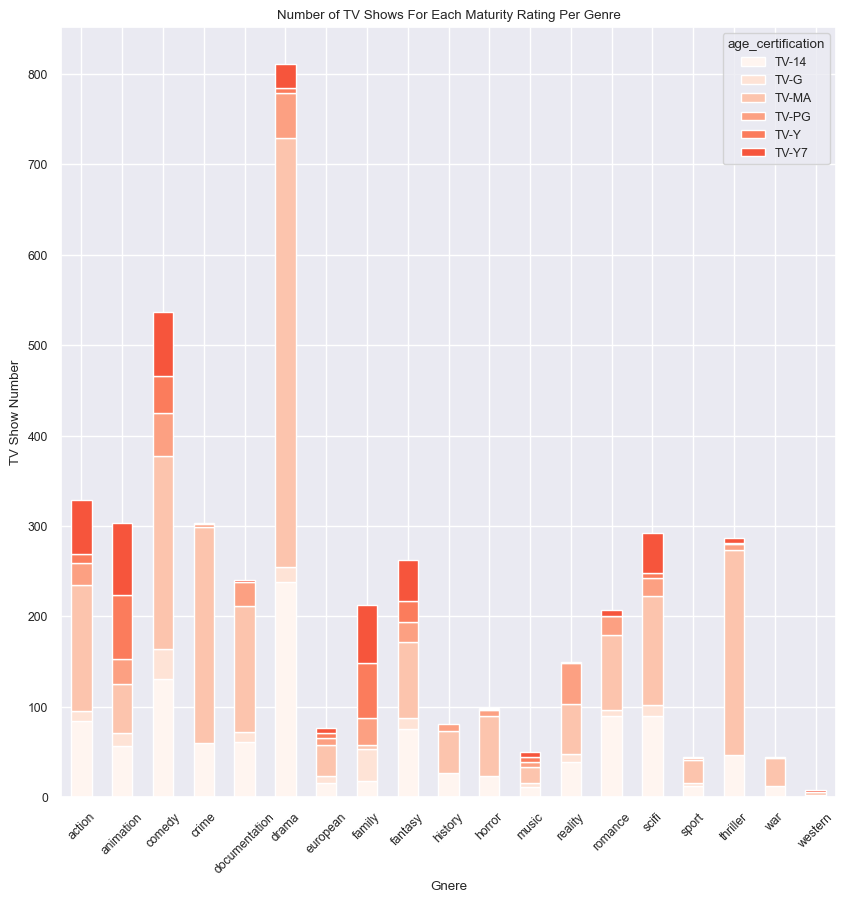

In [632]:
# Configure stacked bar chart
colors = plt.cm.Reds(np.linspace(0, 1, 10))
top_10 = rating_genres.plot.bar(stacked="True", figsize=(10,10), color=colors)
plt.xlabel('Gnere')
plt.ylabel('TV Show Number')
plt.title('Number of TV Shows For Each Maturity Rating Per Genre')

# Configure x-tick rotation
xticklabels = rating_genres_sorted.index
top_10.set_xticklabels(xticklabels, rotation=45)

Analysis:

Comparison of Maturity Rating with IMDB Scores - Which rating performed better?

In [ ]:
# Filter DataFrame
imdb = exploded_genres[["age_certification", "imdb_score"]]

# Group by maturity rating and calculate the average IMDb score
rating_imdb = imdb.groupby('age_certification')['imdb_score'].mean().reset_index()

print(rating_imdb)

  age_certification  imdb_score
0             TV-14    7.273492
1              TV-G    6.482584
2             TV-MA    7.163897
3             TV-PG    7.004178
4              TV-Y    6.413913
5             TV-Y7    6.921327


<Figure size 1000x1000 with 0 Axes>

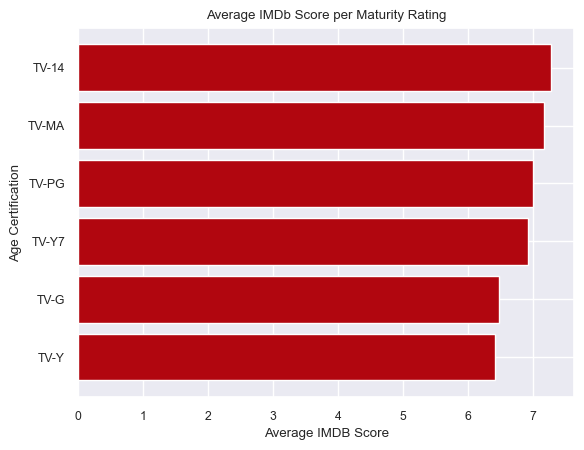

<Figure size 1000x1000 with 0 Axes>

In [630]:
# Sort table
rating_imdb = rating_imdb.sort_values(by=['imdb_score'])

# Configire horizontal bar plot
plt.barh(y=rating_imdb.age_certification, width=rating_imdb.imdb_score, color="#B1060F")

# Set labels and title
plt.xlabel('Average IMDB Score')
plt.ylabel('Age Certification')
plt.title('Average IMDb Score per Maturity Rating')
plt.figure(figsize=(10, 10))

After calculating the average IMDB score accross all maturity ratings, a bar chart was created to compare which rating scored higher. From this, it can be concluded that, although there is only a 2 point difference between the highest and lowest, TV-14 and TV-MA are more popular with subscribers.

Number of TV shows for each Maturity Rating Category

In [ ]:
# Total age_certification count
rating_count = netflix_years["age_certification"].value_counts()

rating_count.head()
display(rating_count)

age_certification
TV-MA    735
TV-14    380
TV-PG    146
TV-Y7     90
TV-Y      77
TV-G      59
Name: count, dtype: int64

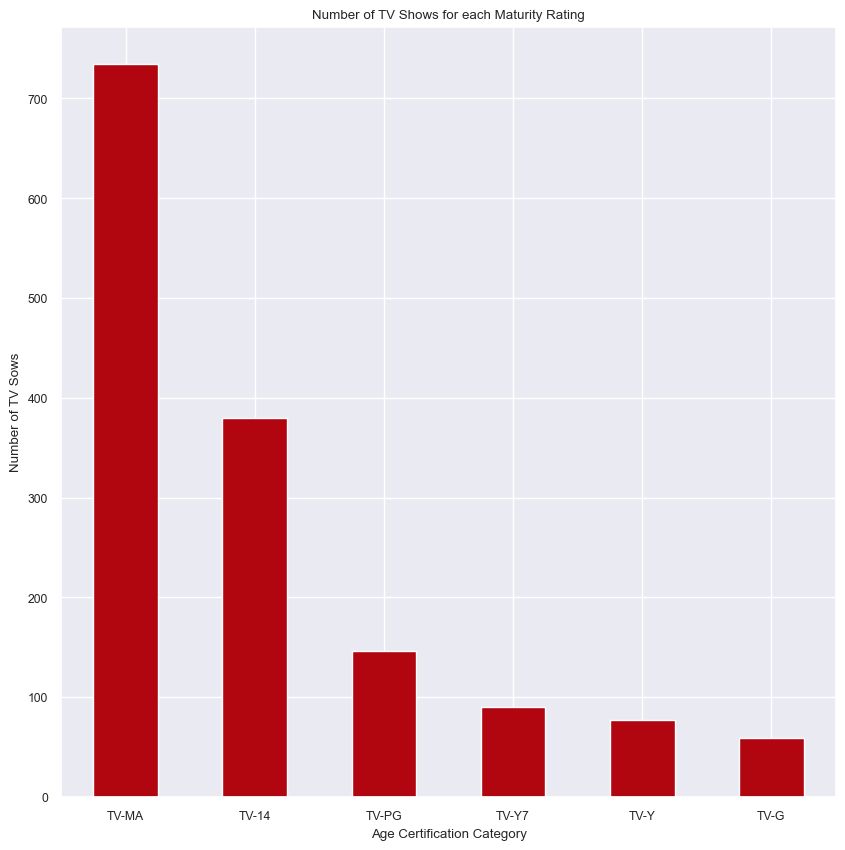

In [579]:
# Configure bar chart and labels
figure2 = rating_count.plot(kind="bar", figsize=(10,10),
                 title="Number of TV Shows for each Maturity Rating",
                 xlabel="Age Certification Category",
                 ylabel="Number of TV Sows",
                 color="#B1060F")

# Configure x-tick rotation
xticklabels = rating_count.index
figure2.set_xticklabels(xticklabels, rotation=360)

plt.show()

To find out the most popular category in maturity ratings, a bar chart was created displaying the number of tv shows that have been produced within each of the categories since 2007. The results show that TV-MA has significantly more tv shows produced overall and thus we can conclude that netflix users are predominantly young adults and older, or that netflix creates shows more for adults than children.

Number Of Shows Produced Within Each Maturity Rating Since 2007 - Line Graph

In [609]:
# Grouping by release year and maturity ratings with counts
ratings = exploded_genres.groupby(['release_year', 'age_certification']).size().reset_index(name='count')

ratings.head()

,release_year,age_certification,count
0,2007,TV-14,5
1,2007,TV-G,7
2,2007,TV-PG,8
3,2007,TV-Y7,4
4,2008,TV-14,11


In [617]:
# Calculate the total count for each age_certification
ratings_total = ratings.groupby('age_certification')['count'].sum()

# Create filtered DataFrame
ratings_total_df = ratings_total.reset_index().set_index('age_certification')

ratings_total_df.head(6)

,count
age_certification,
TV-14,1094
TV-G,178
TV-MA,2058
TV-PG,359
TV-Y,230
TV-Y7,422


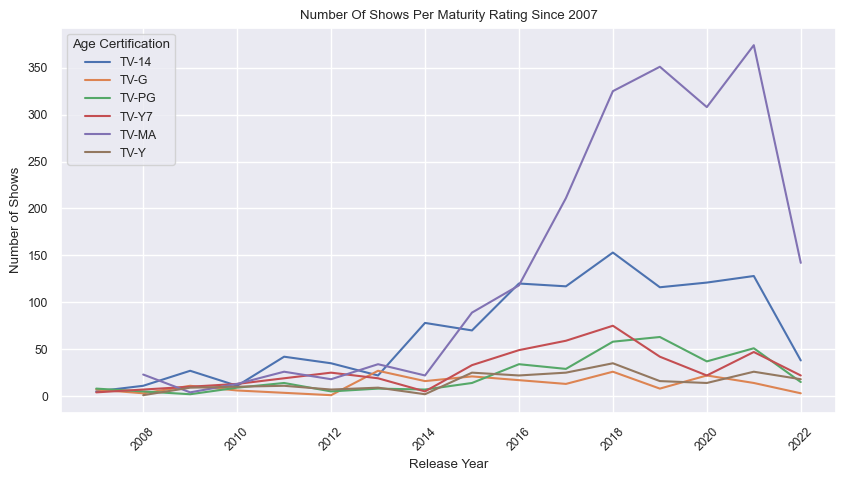

In [628]:
# Plotting line graph
plt.figure(figsize=(10, 5))
sns.lineplot(data=ratings, x="release_year", y="count", markers='0', hue="age_certification")
plt.title('Number Of Shows Per Maturity Rating Since 2007')
plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.legend(title='Age Certification', loc="upper left")
plt.xticks(rotation=45)
plt.grid(True)

Analysis:

In [ ]:
# Filter rows with all ratings from 2007 onwards
maturity_rating = exploded_genres[exploded_genres["age_certification"].isin(ratings.index)]

# Count the number of shows produced each year for each rating
tv_ma = maturity_rating.groupby("release_year").size().reset_index(name="show_number")
tv_ma
# Configure line plot
#plt.figure(figsize=(10, 10))
#sns.lineplot(x="release_year", y="show_number", data=tv_ma, marker='o', color='#7EA16B')
#plt.title("Number of TV Shows produced with a TV-MA Rating since 2007")
#plt.xlabel("Release Year")
#plt.ylabel("Number of TV Shows")


,release_year,show_number
0,2008,23
1,2009,4
2,2010,13
3,2011,26
4,2012,18
5,2013,34
6,2014,22
7,2015,89
8,2016,118
9,2017,211


In [ ]:
# Repeat process for TV-14

# Filter rows with TV-MA rating from 2007 onwards
maturity_rating = exploded_genres[exploded_genres["age_certification"].isin(["TV-14"])]

# Count the number of TV-MA shows produced each year
tv_14 = maturity_rating.groupby("release_year").size().reset_index(name="show_number")
tv_14
# Configure line plot
#plt.figure(figsize=(10, 10))
#sns.lineplot(x="release_year", y="show_number", data=tv_14, marker='o', color='#7EA16B')
#plt.title("Number of TV Shows produced with an TV-14 Rating since 2007")
#plt.xlabel("Release Year")
#plt.ylabel("Number of TV Shows")

,release_year,show_number
0,2007,5
1,2008,11
2,2009,27
3,2010,11
4,2011,42
5,2012,35
6,2013,22
7,2014,78
8,2015,70
9,2016,120


In [ ]:
# Repeat process for TV-PG

# Filter rows with TV-MA rating from 2007 onwards
maturity_rating = exploded_genres[exploded_genres["age_certification"].isin(["TV-PG"])]

# Count the number of TV-MA shows produced each year
tv_pg = maturity_rating.groupby("release_year").size().reset_index(name="show_number")
tv_pg
# Configure line plot
#plt.figure(figsize=(10, 10))
#sns.lineplot(x="release_year", y="show_number", data=tv_ma, marker='o', color='#7EA16B')
#plt.title("Number of TV Shows produced with an TV-PG Rating since 2007")
#plt.xlabel("Release Year")
#plt.ylabel("Number of TV Shows")

,release_year,show_number
0,2007,8
1,2008,5
2,2009,2
3,2010,9
4,2011,14
5,2012,5
6,2013,8
7,2014,7
8,2015,14
9,2016,34


In [ ]:
# Repeat process for TV-Y7

# Filter rows with TV-MA rating from 2007 onwards
maturity_rating = exploded_genres[exploded_genres["age_certification"].isin(["TV-Y7"])]

# Count the number of TV-MA shows produced each year
tv_y7 = maturity_rating.groupby("release_year").size().reset_index(name="show_number")
tv_y7
# Configure line plot
#plt.figure(figsize=(10, 10))
#sns.lineplot(x="release_year", y="show_number", data=tv_y7, marker='o', color='#7EA16B')
#plt.title("Number of TV Shows produced with an TV-Y7 Rating since 2007")
#plt.xlabel("Release Year")
#plt.ylabel("Number of TV Shows")

,release_year,show_number
0,2007,4
1,2008,7
2,2010,13
3,2012,25
4,2013,19
5,2014,5
6,2015,33
7,2016,49
8,2017,59
9,2018,75


In [ ]:
# Repeat process for TV-Y

# Filter rows with TV-MA rating from 2007 onwards
maturity_rating = exploded_genres[exploded_genres["age_certification"].isin(["TV-Y"])]

# Count the number of TV-MA shows produced each year
tv_y = maturity_rating.groupby("release_year").size().reset_index(name="show_number")
tv_y
# Configure line plot
#plt.figure(figsize=(10, 10))
##sns.lineplot(x="release_year", y="show_number", data=tv_y, marker='o', color='#7EA16B')
#plt.title("Number of TV Shows produced with an TV-Y Rating since 2007")
#plt.xlabel("Release Year")
#plt.ylabel("Number of TV Shows")

,release_year,show_number
0,2008,1
1,2009,9
2,2010,10
3,2011,11
4,2012,7
5,2013,9
6,2014,2
7,2015,25
8,2016,22
9,2017,25


In [ ]:
# Repeat process for TV-G

# Filter rows with TV-MA rating from 2007 onwards
maturity_rating = exploded_genres[exploded_genres["age_certification"].isin(["TV-G"])]

# Count the number of TV-MA shows produced each year
tv_g = maturity_rating.groupby("release_year").size().reset_index(name="show_number")
tv_g
# Configure line plot
#plt.figure(figsize=(10, 10))
#sns.lineplot(x="release_year", y="show_number", data=tv_g, marker='o', color='#7EA16B')
#plt.title("Number of TV Shows produced with an TV-G Rating since 2007")
#plt.xlabel("Release Year")
#plt.ylabel("Number of TV Shows")

,release_year,show_number
0,2007,7
1,2008,3
2,2009,11
3,2010,6
4,2012,1
5,2013,27
6,2014,16
7,2015,21
8,2017,13
9,2018,26


Analysis:

Number of Shows Produced Within Each Maturity Rating Since 2007 - Heatmap

In [521]:
# Create filtered DataFrame
new_df = exploded_genres[["release_year", "age_certification"]]

new_df = new_df.groupby('age_certification').release_year.value_counts().unstack().fillna(0)

new_df.head(6)

release_year,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
age_certification,,,,,,,,,,,,,,,,
TV-14,5.0,11.0,27.0,11.0,42.0,35.0,22.0,78.0,70.0,120.0,117.0,153.0,116.0,121.0,128.0,38.0
TV-G,7.0,3.0,11.0,6.0,0.0,1.0,27.0,16.0,21.0,0.0,13.0,26.0,8.0,22.0,14.0,3.0
TV-MA,0.0,23.0,4.0,13.0,26.0,18.0,34.0,22.0,89.0,118.0,211.0,325.0,351.0,308.0,374.0,142.0
TV-PG,8.0,5.0,2.0,9.0,14.0,5.0,8.0,7.0,14.0,34.0,29.0,58.0,63.0,37.0,51.0,15.0
TV-Y,0.0,1.0,9.0,10.0,11.0,7.0,9.0,2.0,25.0,22.0,25.0,35.0,16.0,14.0,26.0,18.0
TV-Y7,4.0,7.0,0.0,13.0,0.0,25.0,19.0,5.0,33.0,49.0,59.0,75.0,42.0,22.0,47.0,22.0


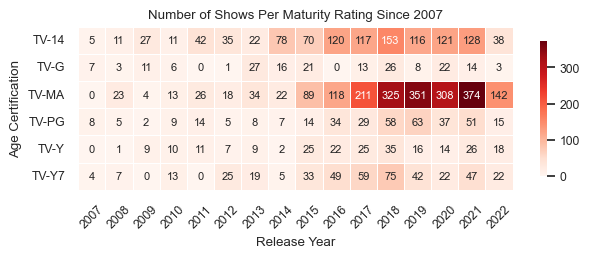

In [605]:
# Create heatmap
font = sns.set(font_scale=0.8)
sns.heatmap(new_df, annot=True, fmt=".0f", cmap="Reds", linewidths=.5, square=True, cbar_kws={'shrink': 0.3},
            annot_kws={
                'fontsize': 8
            })

plt.figsize=(20, 20)
plt.title('Number of Shows Per Maturity Rating Since 2007')
plt.xlabel('Release Year')
plt.ylabel('Age Certification')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

In [389]:
new_df.corr()

release_year,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
release_year,,,,,,,,,,,,,,,,
2007,1.000000,-0.412778,0.095611,-0.596427,-0.181013,-0.187097,-0.214119,0.119152,-0.517590,-0.353418,-0.518389,-0.504502,-0.488918,-0.486075,-0.525973,-0.608938
2008,-0.412778,1.000000,-0.001703,0.635887,0.566471,0.477387,0.730670,0.351894,0.916612,0.850229,0.982347,0.990338,0.977379,0.974125,0.977345,0.955693
2009,0.095611,-0.001703,1.000000,-0.188851,0.681955,0.458810,0.146083,0.892626,0.338626,0.382045,0.111936,0.037942,-0.058374,0.055213,-0.031424,-0.112191
2010,-0.596427,0.635887,-0.188851,1.000000,0.347875,0.711524,0.187831,0.117565,0.630855,0.704030,0.686570,0.639759,0.582940,0.530189,0.588504,0.620143
2011,-0.181013,0.566471,0.681955,0.347875,1.000000,0.630911,0.212039,0.842448,0.740416,0.856699,0.655038,0.613371,0.555093,0.604029,0.556712,0.481461
2012,-0.187097,0.477387,0.458810,0.711524,0.630911,1.000000,0.272375,0.713551,0.661642,0.802245,0.561129,0.460158,0.331500,0.354054,0.347095,0.304137
2013,-0.214119,0.730670,0.146083,0.187831,0.212039,0.272375,1.000000,0.335571,0.715077,0.487824,0.692010,0.692240,0.659971,0.714796,0.684227,0.661350
2014,0.119152,0.351894,0.892626,0.117565,0.842448,0.713551,0.335571,1.000000,0.602165,0.699714,0.430837,0.356305,0.252711,0.340916,0.266495,0.167482
2015,-0.517590,0.916612,0.338626,0.630855,0.740416,0.661642,0.715077,0.602165,1.000000,0.933156,0.967257,0.935855,0.876838,0.913541,0.895993,0.867193


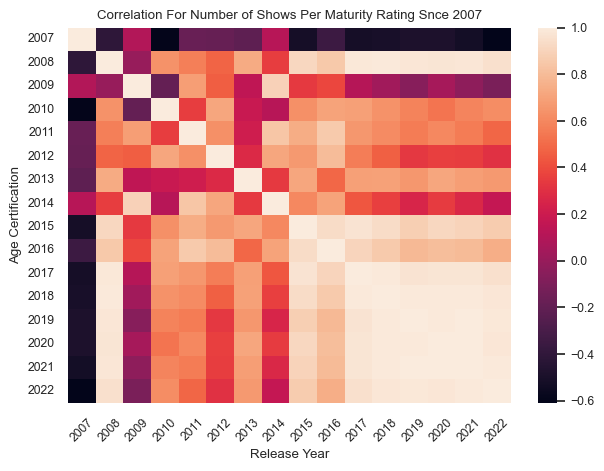

In [580]:
sns.heatmap(new_df.corr())

plt.title('Correlation For Number of Shows Per Maturity Rating Snce 2007')
plt.xlabel('Release Year')
plt.ylabel('Age Certification')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

Analysis:

Final Conclusion of Results

